In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from joblib import load

from helper import *

In [6]:
showings = load('../data/showings_extra_feature.joblib')
showings.replace(np.inf, 0, inplace=True)
genres = load('../data/genres.joblib')

# Coverage by Genres by year

In [4]:
genre = set()
all_genres = showings.tmdb_genre_ids.tolist()
for i in all_genres:
    genre.update(i)

In [32]:
%%time
stats = dict()
for i in range(2007, 2021):
    stats[i] = dict()
    temp = showings.loc[showings.year == i, ('tmdb_genre_ids', 'coverage')]
    for j in genre:
        stats[i][genres[j]] = temp.loc[temp.tmdb_genre_ids.apply(lambda numbers: j in numbers), 'coverage']

Wall time: 4.33 s


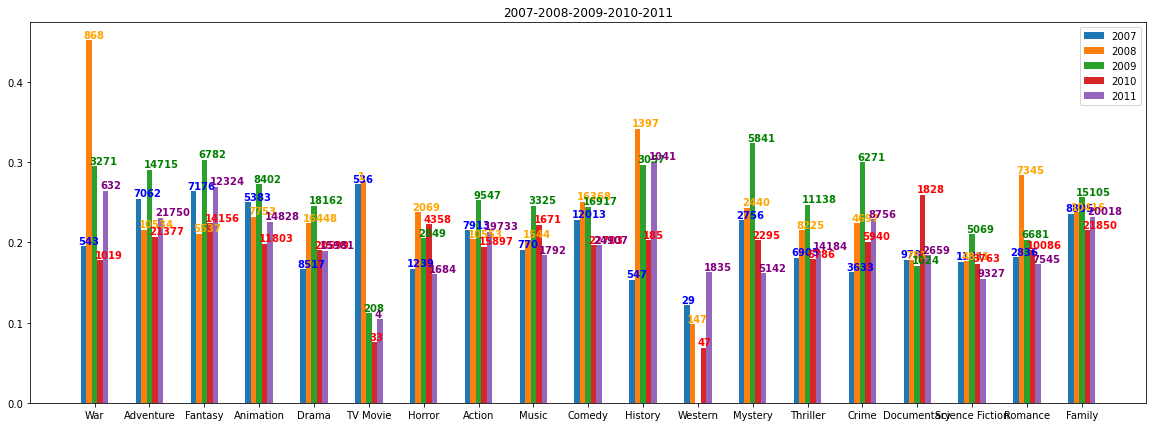

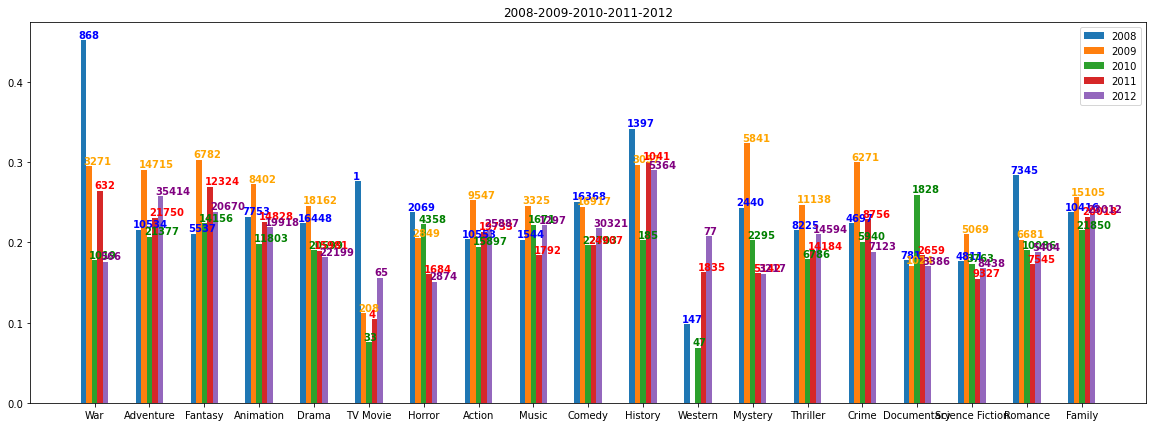

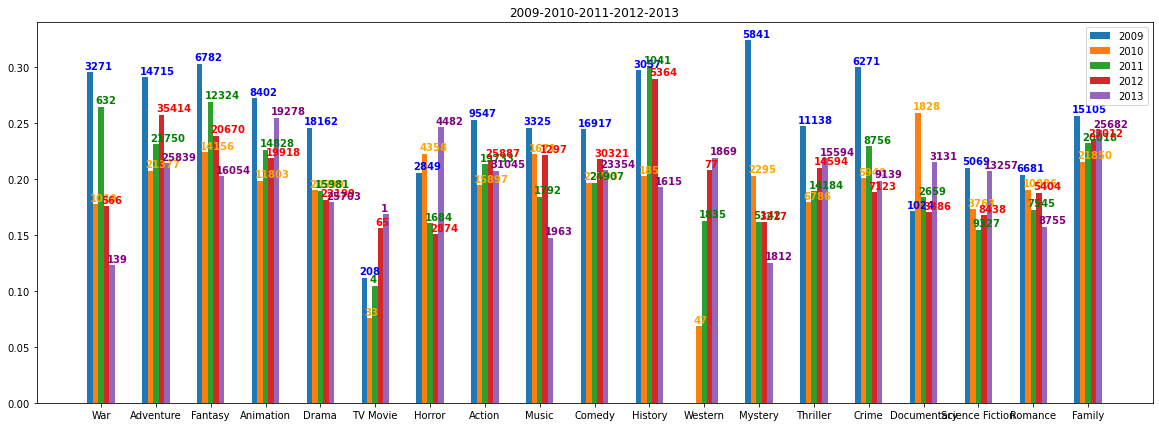

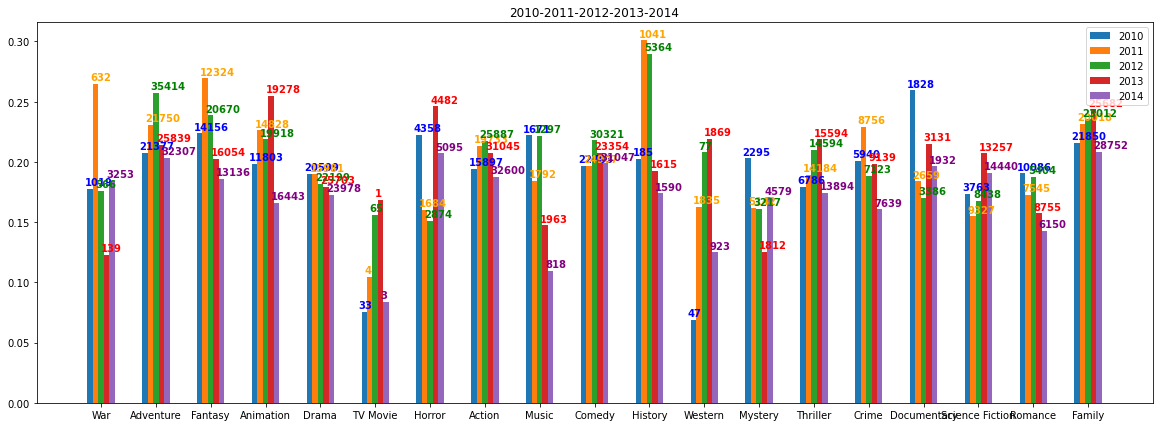

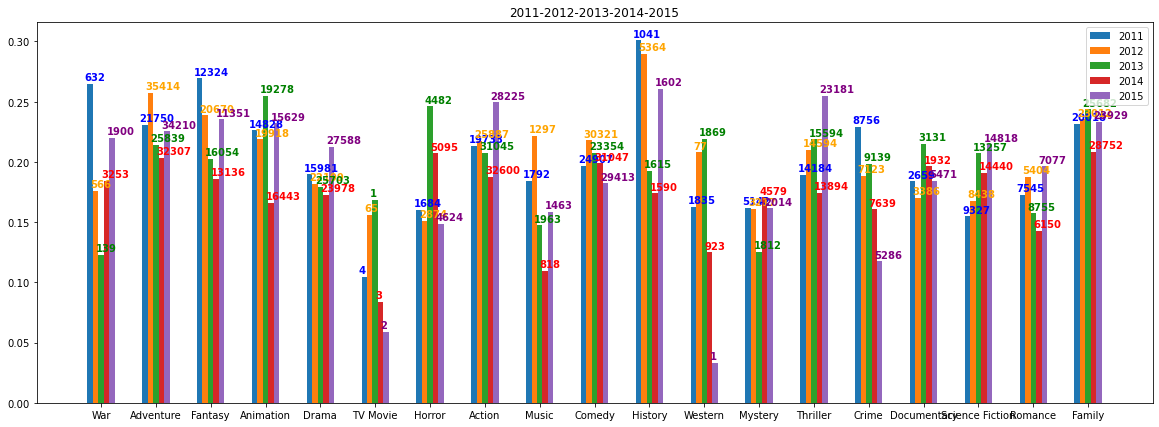

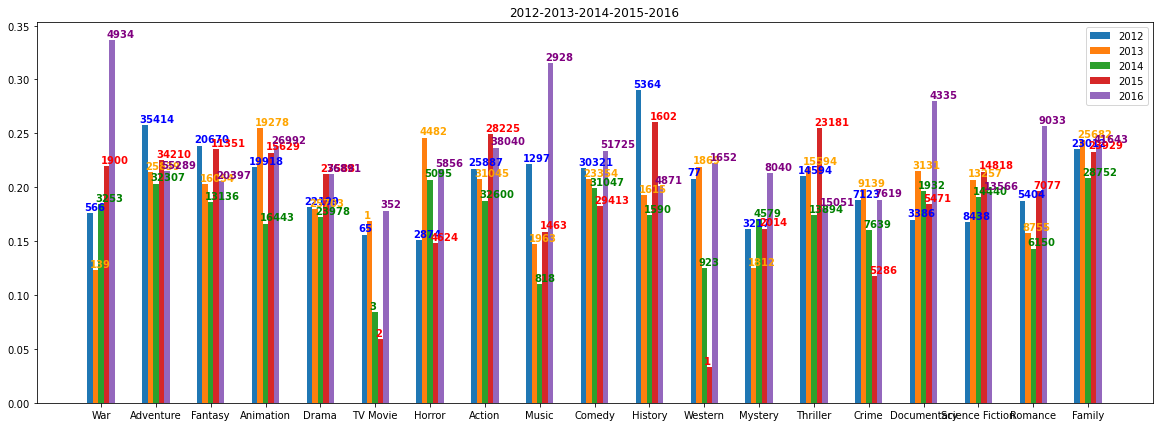

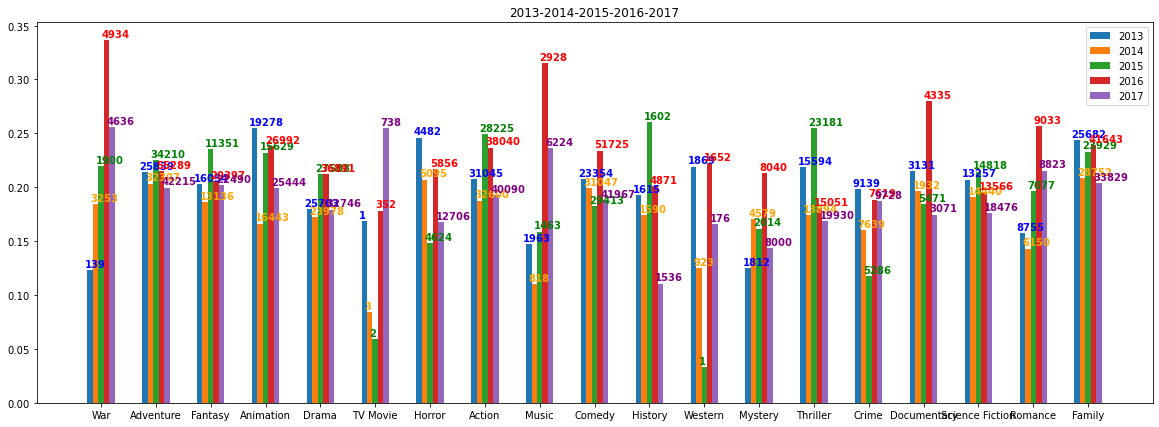

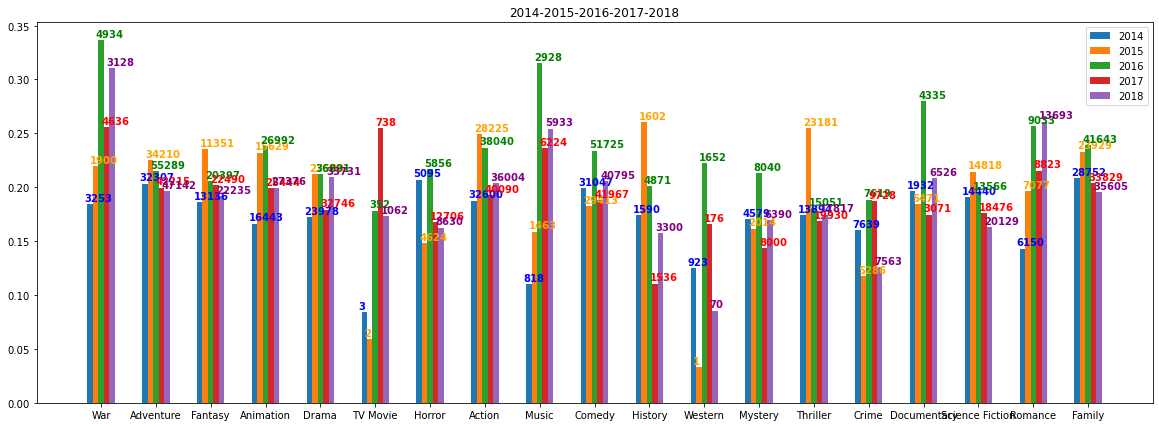

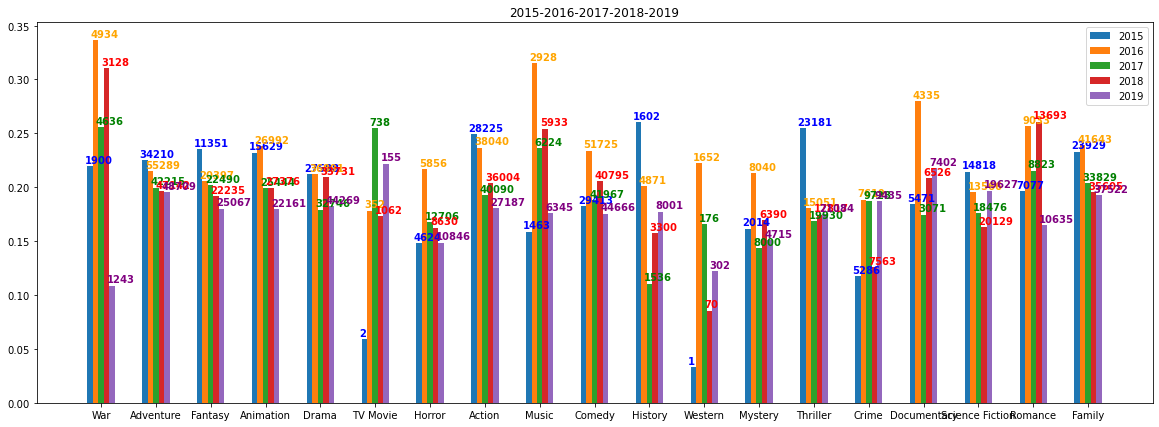

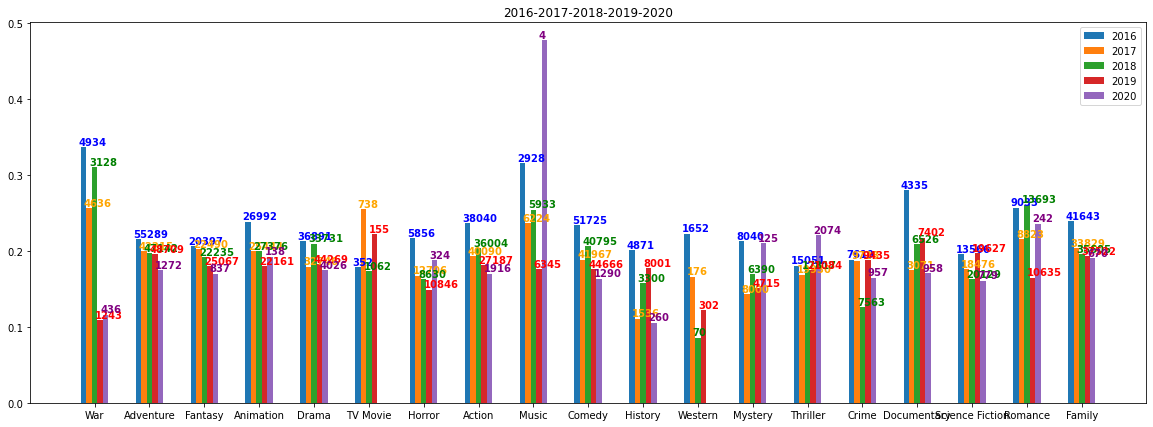

In [33]:
for i in stats:
    if i+4 == 2021: break
    five_bar_plot(stats[i], stats[i+1], stats[i+2], stats[i+3], stats[i+4],
                  title =str(i)+'-'+str(i+1)+'-'+str(i+2)+'-'+str(i+3)+'-'+str(i+4),
                  legend=(str(i), str(i+1), str(i+2), str(i+3), str(i+4)),
                  w=20, h=7, count=True)